# 📈 Trending In-Demand Skills for Data Analysts (US)

### **Methodology**
1. Aggregate skill counts monthly  
2. Analyze based on percentage of total jobs  
3. Plot the monthly skill demand

---

## 🛠 **Setup: Import Libraries and Load Data**

We will use the **full job postings dataset (2023–2024)** from [datanerd.tech](https://datanerd.tech) to analyze US Data Analyst skills.  

> **Dataset Source:**  
> - Originally part of the Python Data Analyst course, extended with full dataset covering 2023 through the latest update.  
> - File: `job_postings_flat.csv` (local CSV, not pushed to GitHub due to size >100MB).  
> - Updated twice a year to reflect the most recent job trends.

We filter to **2024** to focus on the most recent complete year, ensuring our analysis of skill demand and salary is current and relevant.

In [1]:
# Import required libraries
import ast
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Configure data source - Base project directory
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Full path to CSV using relative structure
CSV_PATH = os.path.join(BASE_DIR, 'data', 'Job_Postings_2023-2024.csv')

# Load data automatically
if os.path.exists(CSV_PATH):
    print(f"Loading local CSV from '{CSV_PATH}'...")
    df = pd.read_csv(CSV_PATH)
else:
    print("Local CSV not found. Loading dataset from Hugging Face...")
    dataset = load_dataset('lukebarousse/data_jobs')
    df = dataset['train'].to_pandas()

# Clean and prepare data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df = df[df['job_posted_date'].dt.year == 2024]

print(f"Data loaded successfully!")

Loading local CSV from '/Users/nadia_rozman/Python_for_Data_Analytics/Project/data/Job_Postings_2023-2024.csv'...
Data loaded successfully!


## 🔍 **Filter Data for US Data Analyst Roles**
Focus only on job postings for **Data Analysts** in the United States and extract the posting month.

In [2]:
# Focus on Data Analysts in United States and extract posting month
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

# Explode skills column to individual rows
df_DA_US_explode = df_DA_US.explode('job_skills')

## 📊 **Pivot Table: Skill Counts by Month**
Create a pivot table with months as rows, skills as columns, and job counts as values.  
Sort skills by total demand to highlight the most requested skills.

In [3]:
# Create pivot table with months as rows, skills as columns
df_DA_US_pivot = df_DA_US_explode.pivot_table(
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

# Sort skills by total demand for visibility
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')
df_DA_US_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,word,aws,powerpoint,...,rust,ubuntu,sass,ovh,selenium,dart,npm,apl,datarobot,redhat
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,572,339,376,288,209,215,182,99,84,75,...,0,0,1,0,1,0,0,0,0,0
2,604,346,410,323,220,226,166,87,92,70,...,1,1,0,0,0,0,1,0,1,1
3,377,235,244,207,154,130,78,55,67,47,...,0,0,0,0,0,0,0,0,0,0
4,346,262,192,180,156,110,132,59,34,56,...,0,0,0,1,0,0,0,0,0,0
5,428,281,240,235,171,137,120,63,39,64,...,0,0,0,0,0,0,0,0,0,0
6,359,237,207,185,157,99,96,53,44,55,...,0,0,0,0,0,0,0,0,0,0
7,506,322,280,240,201,175,190,68,59,62,...,0,0,0,0,0,1,0,0,0,0
8,656,417,374,292,223,262,342,54,98,45,...,0,0,0,0,0,0,0,0,0,0
9,333,229,221,159,116,171,198,43,69,23,...,0,0,0,0,0,0,0,0,0,0


## 📈 **Plot Monthly Skill Counts**
Line chart of the **top 5 skills** over the months.  
This shows raw counts but does not account for variations in total jobs per month.

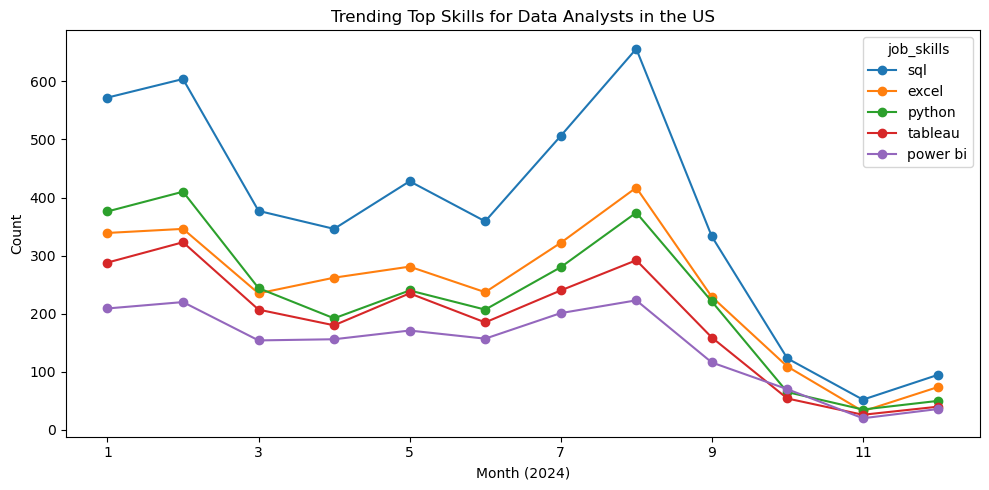

In [4]:
# Line chart of top 5 skills over months (raw counts)
df_DA_US_pivot.iloc[:, :5].plot(kind='line', marker='o', figsize=(10,5))
plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Count')
plt.xlabel('Month (2024)')
plt.tight_layout()
plt.show()

## 📊 **Convert Counts to Percentages**
To compare skills accurately, we calculate the percentage of total job postings per month for each skill.

In [5]:
# Calculate % of total jobs per month for normalization
DA_totals = df_DA_US.groupby('job_posted_month_no').size()
df_DA_US_percent = df_DA_US_pivot.iloc[:12].div(DA_totals/100, axis=0)

# Map month numbers to abbreviated names
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(
    lambda x: pd.to_datetime(x, format='%m').strftime('%b')
)
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')
df_DA_US_percent

job_skills,sql,excel,python,tableau,power bi,r,sas,word,aws,powerpoint,...,rust,ubuntu,sass,ovh,selenium,dart,npm,apl,datarobot,redhat
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,50.754215,30.079858,33.362910,25.554570,18.544809,19.077196,16.149068,8.784383,7.453416,6.654836,...,0.000000,0.000000,0.088731,0.000000,0.088731,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,55.463728,31.772268,37.649219,29.660239,20.202020,20.752984,15.243343,7.988981,8.448118,6.427916,...,0.091827,0.091827,0.000000,0.000000,0.000000,0.000000,0.091827,0.000000,0.091827,0.091827
Mar,55.604720,34.660767,35.988201,30.530973,22.713864,19.174041,11.504425,8.112094,9.882006,6.932153,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,61.675579,46.702317,34.224599,32.085561,27.807487,19.607843,23.529412,10.516934,6.060606,9.982175,...,0.000000,0.000000,0.000000,0.178253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,65.343511,42.900763,36.641221,35.877863,26.106870,20.916031,18.320611,9.618321,5.954198,9.770992,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,59.634551,39.368771,34.385382,30.730897,26.079734,16.445183,15.946844,8.803987,7.308970,9.136213,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,65.374677,41.602067,36.175711,31.007752,25.968992,22.609819,24.547804,8.785530,7.622739,8.010336,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.129199,0.000000,0.000000,0.000000,0.000000
Aug,69.198312,43.987342,39.451477,30.801688,23.523207,27.637131,36.075949,5.696203,10.337553,4.746835,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,62.830189,43.207547,41.698113,30.000000,21.886792,32.264151,37.358491,8.113208,13.018868,4.339623,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 📈 **Plot Monthly Skill Demand (Percentage)**
Line plot of the **top 5 skills** as a percentage of total job postings per month.  
Helps visualize the relative popularity trends.

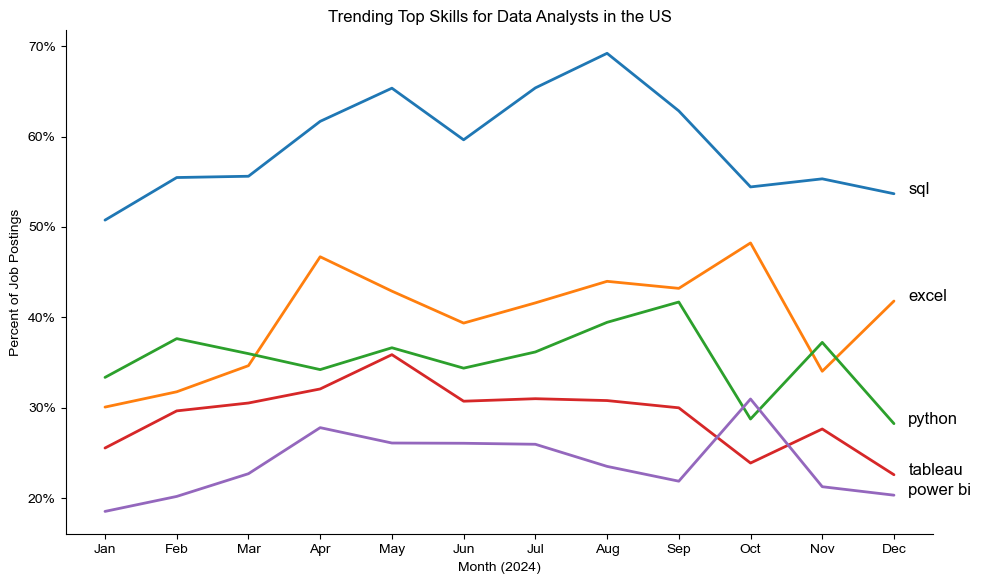

Figure saved successfully!


In [6]:
# Line plot of top 5 skills as percentage of total jobs
from matplotlib.ticker import PercentFormatter
import os
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))

df_plot = df_DA_US_percent.iloc[:, :5]

sns.set_theme(style='ticks')
sns.lineplot(data=df_plot, dashes=False, palette='tab10', linewidth=2, ax=ax)
sns.despine(ax=ax)

ax.set_title('Trending Top Skills for Data Analysts in the US')
ax.set_ylabel('Percent of Job Postings')
ax.set_xlabel('Month (2024)')
ax.legend().remove()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Annotate lines with skill names on the right-hand side
for i in range(5):
    ax.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

fig.tight_layout()

# Save figure
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))  
IMAGES_DIR = os.path.join(BASE_DIR, 'images')
os.makedirs(IMAGES_DIR, exist_ok=True)

# Output file name
FIG_FILENAME = '2_Trending_Top_Skills_for_Data_Analysts_in_the_US.png'
FIG_PATH = os.path.join(IMAGES_DIR, FIG_FILENAME)

plt.savefig(FIG_PATH, dpi=300, bbox_inches='tight')
plt.show()

print(f"Figure saved successfully!")

## 📌 **Key Takeaways**

### **SQL Dominates But Shows Volatility**
**SQL** remains the most demanded skill throughout 2024, ranging from **50–69%** of Data Analyst postings. However, the significant fluctuation—including a sharp drop from 69% (August) to 55% (September)—suggests either seasonal hiring patterns or shifts in job posting sources. Despite volatility, SQL consistently stays above 50%, confirming its position as the foundational skill for Data Analysts.

### **Excel Maintains Steady Mid-Tier Demand**
**Excel** demonstrates remarkable stability, hovering between **30–48%** throughout the year with a spike to 48% in October. This consistency reflects Excel's role as a business-critical tool that transcends market trends. The lack of decline suggests Excel remains relevant even as more technical tools gain traction, making it a reliable skill investment.

### **Python Shows Growing Importance**
**Python** maintains steady demand in the **28–42%** range, with notable strength in mid-year (June-August at ~40%). Unlike visualization tools, Python shows no declining trend, indicating sustained or growing recognition of programming skills for Data Analyst roles. The ~40% demand level positions Python as an increasingly expected skill rather than a rare differentiator.

### **Visualization Tools Face Uncertainty**
Both **Tableau** and **Power BI** show concerning patterns:
- **Tableau**: Relatively stable at **24–36%** through most of the year, but drops sharply to 23% in December
- **Power BI**: Fluctuates between **19–30%**, ending at 21% in December

The year-end decline for both tools (while SQL and Excel remain stable) may signal either seasonal variation or a potential shift in employer preferences. This warrants continued monitoring into 2025.

### **Mid-Year Hiring Surge Affects All Skills**
A notable pattern emerges across all five skills: demand peaks during **April-August**, particularly in August when SQL hits 69%, Excel reaches 44%, and Python climbs to 42%. This mid-year surge likely reflects:
- Summer hiring cycles for fall start dates
- Mid-year budget allocations
- Q3 expansion initiatives

Job seekers should time their applications for **spring/summer** when competition for Data Analyst positions intensifies but opportunities also expand.

### **September Disruption Across the Board**
All five skills experience a significant drop in September, with SQL falling from 69% to 55% and Python declining from 42% to 30%. This synchronized decline suggests:
- Data collection issues or posting platform changes
- Post-summer hiring slowdown
- End-of-Q3 budget freezes

This pattern appears to be market-wide rather than skill-specific, indicating an external factor affecting hiring rather than changes in skill preferences.

---

### 💼 **Strategic Recommendations**

**For Job Seekers:**

1. **Prioritize SQL mastery** - Despite volatility, it remains in 50%+ of postings year-round. This is your highest-ROI investment.

2. **Excel is non-negotiable** - The 30-48% stable demand shows Excel isn't going anywhere. Don't overlook "basic" skills.

3. **Add Python strategically** - At ~40% demand during peak months, Python is becoming table stakes for competitive candidates. Learn it before it becomes mandatory.

4. **Time your job search** - Target applications for **April-August** when all skills show peak demand and hiring activity is highest.

5. **Monitor visualization tool trends** - The December decline warrants attention. Consider learning both Tableau and Power BI to hedge your bets, or watch for 2025 data to confirm if this is a real shift.

**For Career Planning:**

The data suggests a **two-tier skill strategy**:

**Tier 1 - Stable Foundation (Invest First):**
- SQL (50-69% demand, essential)
- Excel (30-48% demand, steady)

**Tier 2 - Growth Skills (Build Next):**
- Python (28-42% demand, rising importance)
- Tableau or Power BI (20-30% demand, monitor trends)

Focus on building a strong Tier 1 foundation before investing heavily in Tier 2 skills. The volatility in visualization tools suggests specialization risk, while SQL and Excel show reliable long-term demand.

---

### 🔍 **Looking Forward**

**Key Question for 2025:** Will the Q4 decline in visualization tools (Tableau/Power BI) continue, or was this seasonal variation? If the downward trend persists into early 2025, it may signal a market shift toward:
- Integrated analytics platforms (reducing standalone BI tool demand)
- Code-based visualization (matplotlib, plotly, ggplot)
- Generative AI tools for data visualization

**Recommendation:** Track January-March 2025 data closely to identify if this is a structural change or temporary fluctuation.